In [2]:
from __future__ import print_function
import os
import torchvision.models as models
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle
import urllib
import time
import copy
import cv2
from PIL import Image

%matplotlib inline

In [3]:
def show_images(loader):
    d = iter(loader)
    images, labels = d.next()
    grid = torchvision.utils.make_grid(images)
    npimg = grid.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    npimg = std * npimg + mean
    print(labels)
    plt.imshow(npimg)
    plt.show()
    
def show_image_batch(images):
    grid = torchvision.utils.make_grid(images)
    npimg = grid.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    npimg = std * npimg + mean
    plt.imshow(npimg)
    plt.show()

In [5]:
model_ft = torch.load('./model_blue_20191104-12-02.pt')
model_ft.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [6]:
testdir = os.path.join(os.getcwd(), 'car_test')

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(testdir, transform),
    batch_size=16,
    num_workers=2)

data_transforms = {
    'val': transform
}

dataloaders_dict = {
    'val': test_loader
}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Done Initializing Datasets and Dataloaders...")


Done Initializing Datasets and Dataloaders...


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


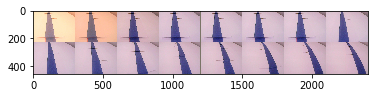

In [7]:
show_images(test_loader)

In [19]:
labels = {0: 'straight', 1: 'right'}
with torch.no_grad():
    running_corrects = 0.0
    for data in test_loader:
        images, labels = data
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        print(labels)
        print(predicted)
        print('\n')
        running_corrects += torch.sum(labels == predicted)
    print("num correct: %s" % running_corrects)
    print('dataset length: %s' % len(test_loader.dataset))
    acc_percent = running_corrects.item() / len(test_loader.dataset)
    print('accuracy: %s' % acc_percent)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 1, 1

tensor([[[[1.2899, 1.2728, 1.2899,  ..., 1.4269, 1.4269, 1.4098],
          [1.2899, 1.2728, 1.2728,  ..., 1.4269, 1.4269, 1.4269],
          [1.2899, 1.2728, 1.2728,  ..., 1.4098, 1.4269, 1.4440],
          ...,
          [1.4954, 1.4783, 1.4440,  ..., 1.4440, 1.4440, 1.4098],
          [1.4954, 1.4783, 1.4612,  ..., 1.4440, 1.4440, 1.4269],
          [1.5125, 1.4783, 1.4269,  ..., 1.4440, 1.4440, 1.4440]],

         [[0.9405, 0.9230, 0.9405,  ..., 1.0805, 1.0805, 1.0630],
          [0.9405, 0.9230, 0.9230,  ..., 1.0805, 1.0805, 1.0805],
          [0.9405, 0.9230, 0.9230,  ..., 1.0630, 1.0805, 1.0980],
          ...,
          [1.1331, 1.1331, 1.1331,  ..., 1.0805, 1.0805, 1.0630],
          [1.1331, 1.1331, 1.1331,  ..., 1.0805, 1.0805, 1.0630],
          [1.1506, 1.1331, 1.1155,  ..., 1.0805, 1.0805, 1.0805]],

         [[0.5136, 0.4962, 0.5136,  ..., 0.6008, 0.6182, 0.6008],
          [0.5136, 0.4962, 0.4962,  ..., 0.6182, 0.6182, 0.6182],
          [0.5136, 0.4962, 0.4962,  ..., 0

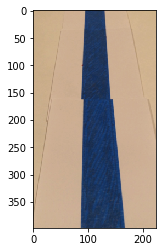

tensor([[ 3.5926, -3.2478]])


In [35]:
with torch.no_grad():
    model_ft.eval()
    img = cv2.imread('/Users/bryantpham/Documents/fa19/ML/FinalProject/testimgs/test-blue-straight-1-000001.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)

    t = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = t(img).float()
    img = img.unsqueeze(0)
    img = torch.autograd.Variable(img)
    print(img)
    show_image_batch(img)

    outputs = model_ft(img)
    _, predicted = torch.max(outputs.data, 1)
    print(outputs)